##  Importing the Libraries

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image
import pandas as pd
import seaborn as sns
print(os.listdir('C:\Data_Science_Engineering_Methonds_And_Tools\Info_6105\Info_6105_Project\chest_xray'))

#Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

['chest_xray', 'test', 'train', 'val', '__MACOSX']


In [3]:
mainDIR = os.listdir('C:\Data_Science_Engineering_Methonds_And_Tools\Info_6105\Info_6105_Project\chest_xray\chest_xray')
print(mainDIR)

['.DS_Store', 'test', 'train', 'val']


In [4]:
train_folder = ('C:\Data_Science_Engineering_Methonds_And_Tools/Info_6105/Info_6105_Project/chest_xray/chest_xray/train/')
test_folder = ('C:\Data_Science_Engineering_Methonds_And_Tools/Info_6105/Info_6105_Project/chest_xray/chest_xray/test/')
val_folder = ('C:\Data_Science_Engineering_Methonds_And_Tools/Info_6105/Info_6105_Project/chest_xray/chest_xray/val/')

## Setup Training and Testing Folders

In [5]:
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

## First look at some of the X-ray(s)

1342
normal picture title:  NORMAL2-IM-1014-0001.jpeg
pneumonia picture title: person1484_virus_2577.jpeg


Text(0.5, 1.0, 'Pneumonia')

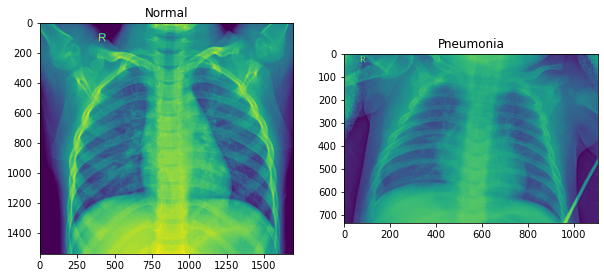

In [6]:
#Normal XRAY
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

## Building the Neural Network!

In [7]:
#Building the Neural Network

cnn = Sequential()

#Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

#Pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn.add(Flatten())

# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [8]:
num_of_test_samples = 600
batch_size = 32

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255) #Image normalization

training_set = train_datagen.flow_from_directory('C:\Data_Science_Engineering_Methonds_And_Tools/Info_6105/Info_6105_Project/chest_xray/chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory('C:\Data_Science_Engineering_Methonds_And_Tools/Info_6105/Info_6105_Project/chest_xray/chest_xray/val',
                                                       target_size = (64, 64),
                                                        batch_size = 32,
                                                       class_mode = 'binary')

test_set = test_datagen.flow_from_directory('C:\Data_Science_Engineering_Methonds_And_Tools/Info_6105/Info_6105_Project/chest_xray/chest_xray/test',
                                           target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')



Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Fetching the Model Summary to see how the model is set up

In [10]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

## Training the Model

In [11]:
cnn_model = cnn.fit_generator(training_set,
                             steps_per_epoch = 163,
                             epochs = 12,
                             validation_data = validation_generator, 
                             validation_steps = 624)

Epoch 1/12
163/163 [==============================] - 196s 1s/step - loss: 0.3605 - accuracy: 0.8390 - val_loss: 0.3148 - val_accuracy: 0.8125
Epoch 2/12
163/163 [==============================] - 191s 1s/step - loss: 0.2354 - accuracy: 0.9030 - val_loss: 0.3167 - val_accuracy: 0.9375
Epoch 3/12
163/163 [==============================] - 191s 1s/step - loss: 0.2080 - accuracy: 0.9149 - val_loss: 0.3678 - val_accuracy: 0.8125
Epoch 4/12
163/163 [==============================] - 191s 1s/step - loss: 0.1700 - accuracy: 0.9367 - val_loss: 0.3191 - val_accuracy: 0.8125
Epoch 5/12
163/163 [==============================] - 194s 1s/step - loss: 0.1681 - accuracy: 0.9352 - val_loss: 0.4294 - val_accuracy: 0.8125
Epoch 6/12
163/163 [==============================] - 196s 1s/step - loss: 0.1763 - accuracy: 0.9319 - val_loss: 0.3149 - val_accuracy: 0.8125
Epoch 7/12
163/163 [==============================] - 196s 1s/step - loss: 0.1655 - accuracy: 0.9369 - val_loss: 0.7775 - val_accuracy: 0.6250

## Plotting Accuracy vs Epochs and Loss vs Epochs

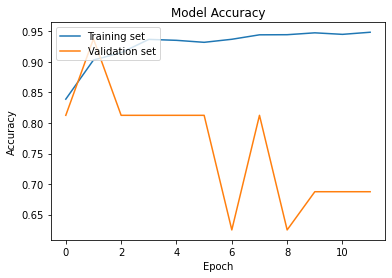

In [12]:
# Accuracy vs Number of Epochs
plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

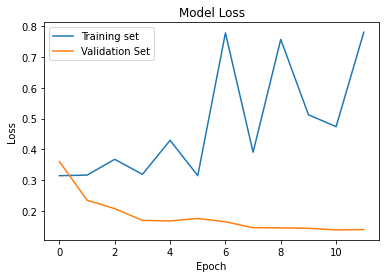

In [13]:
# Loss vs Number of Epochs

plt.plot(cnn_model.history['val_loss'])
plt.plot(cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation Set'], loc='upper left')
plt.show()

## Evaluating the Model Performance using the Test Set

In [19]:
test_accuracy = cnn.evaluate(test_set)

20/20 [==============================] - 7s 335ms/step


In [20]:
print('The accuracy on the test set is :', test_accuracy[1]*100, '%')

The accuracy on the test set is : 82.53205418586731 %
